In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import matplotlib.colors as clr
from scipy.stats import gaussian_kde
import scipy.sparse as sp

warnings.filterwarnings("ignore")

In [3]:
spatial_long_path = "comparison objects/spatial_contrast_long.csv"
spatial_wide_path = "comparison objects/spatial_contrast_wide.csv"

spatial_long = pd.read_csv(spatial_long_path)
spatial_wide = pd.read_csv(spatial_wide_path)

clone13_long_path = "comparison objects/clone13_contrast_long.csv"
clone13_wide_path = "comparison objects/clone13_contrast_wide.csv"

clone13_long = pd.read_csv(clone13_long_path)
clone13_wide = pd.read_csv(clone13_wide_path)

In [5]:
spatial_long['gene'].unique()

array(['Slamf6', 'Il7r', 'Tcf7', 'Il18r1', 'Ifng', 'Ccr7', 'Gzma', 'Gzmb',
       'Pdcd1', 'Ifngr2', 'Runx3', 'Itgae', 'Srebf2', 'Il2rb', 'Cd69'],
      dtype=object)

,gene,contrast,delta_spatial,delta_clone13,delta_diff
25,Runx3,Crypt IE - Muscularis,-0.568523,0.564651,1.133174
115,Runx3,Muscularis - Top IE,0.451426,-0.652298,-1.103723
113,Pdcd1,Muscularis - Top IE,-0.412313,0.663731,1.076043
130,Runx3,Muscularis - Top LP,0.303271,-0.567742,-0.871013
16,Il7r,Crypt IE - Muscularis,0.781437,-0.060560,-0.841997
70,Runx3,Crypt LP - Muscularis,-0.719762,0.119312,0.839074
46,Il7r,Crypt IE - Top LP,0.311675,-0.504673,-0.816348
132,Srebf2,Muscularis - Top LP,0.071601,-0.714360,-0.785961
110,Ccr7,Muscularis - Top IE,-0.198313,0.582959,0.781272
117,Srebf2,Muscularis - Top IE,-0.078489,-0.815409,-0.736919


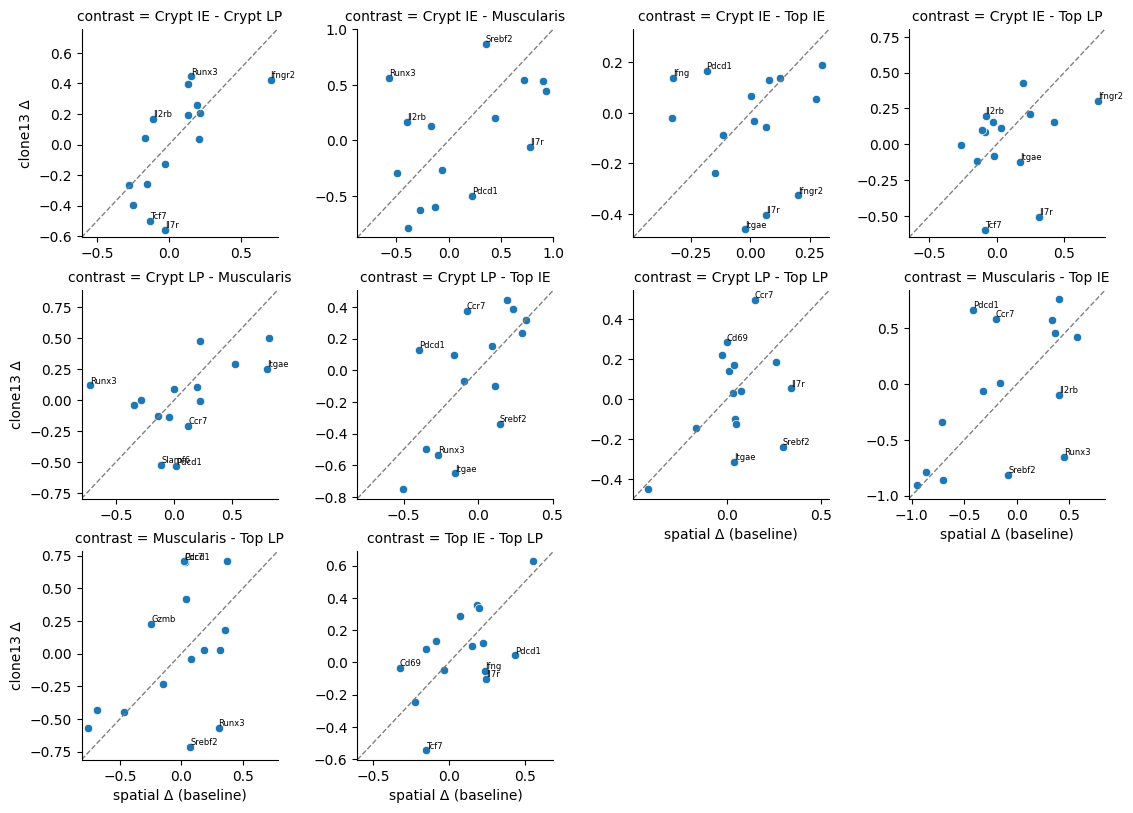

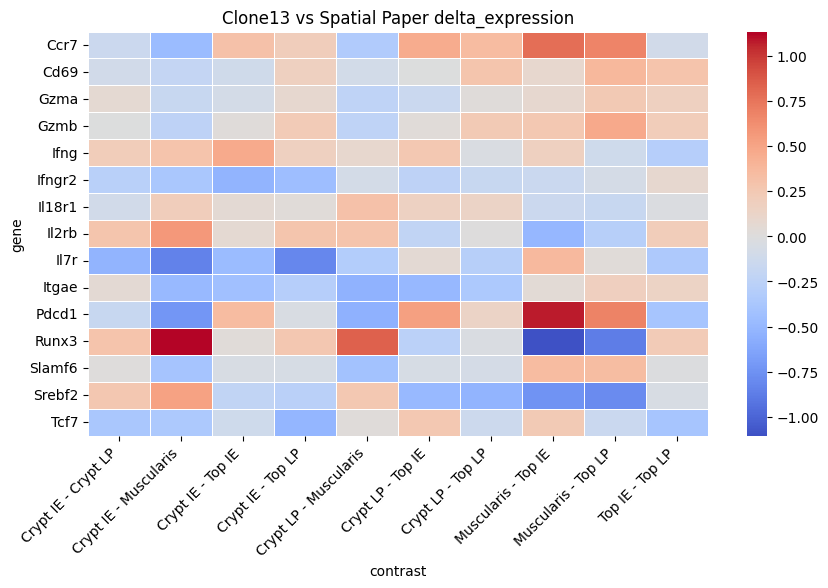

,gene,contrast,delta_spatial,delta_clone13,delta_diff,abs_diff,rank_abs
1,Il7r,Crypt IE - Crypt LP,-0.029493,-0.557911,-0.528418,0.528418,1.0
2,Tcf7,Crypt IE - Crypt LP,-0.129253,-0.500552,-0.371299,0.371299,2.0
10,Runx3,Crypt IE - Crypt LP,0.151239,0.445339,0.294100,0.294100,3.0
9,Ifngr2,Crypt IE - Crypt LP,0.706334,0.424409,-0.281926,0.281926,4.0
13,Il2rb,Crypt IE - Crypt LP,-0.112617,0.165765,0.278382,0.278382,5.0
...,...,...,...,...,...,...,...
145,Runx3,Top IE - Top LP,-0.148155,0.084555,0.232710,0.232710,6.0
142,Gzmb,Top IE - Top LP,0.072169,0.287611,0.215442,0.215442,7.0
148,Il2rb,Top IE - Top LP,-0.085081,0.130349,0.215430,0.215430,8.0
141,Gzma,Top IE - Top LP,0.185883,0.354621,0.168738,0.168738,9.0


,gene,contrast,delta_spatial,delta_clone13,delta_diff,abs_diff,rank_abs
1,Il7r,Crypt IE - Crypt LP,-0.029493,-0.557911,-0.528418,0.528418,1.0
2,Tcf7,Crypt IE - Crypt LP,-0.129253,-0.500552,-0.371299,0.371299,2.0
10,Runx3,Crypt IE - Crypt LP,0.151239,0.445339,0.294100,0.294100,3.0
9,Ifngr2,Crypt IE - Crypt LP,0.706334,0.424409,-0.281926,0.281926,4.0
13,Il2rb,Crypt IE - Crypt LP,-0.112617,0.165765,0.278382,0.278382,5.0
...,...,...,...,...,...,...,...
145,Runx3,Top IE - Top LP,-0.148155,0.084555,0.232710,0.232710,6.0
142,Gzmb,Top IE - Top LP,0.072169,0.287611,0.215442,0.215442,7.0
148,Il2rb,Top IE - Top LP,-0.085081,0.130349,0.215430,0.215430,8.0
141,Gzma,Top IE - Top LP,0.185883,0.354621,0.168738,0.168738,9.0


In [29]:
# Compare clone13 vs spatial (spatial as baseline)

spatial_use = spatial_long[spatial_long["contrast"] != "contrast_norm"]
clone13_use = clone13_long[clone13_long["contrast"] != "contrast_norm"]

# align on gene and contrast
merged = (
    spatial_use.rename(columns={"delta_expression": "delta_spatial"})
    .merge(
        clone13_use.rename(columns={"delta_expression": "delta_clone13"}),
        on=["gene", "contrast"],
        how="inner",  # use "outer" if you want non-overlapping rows too
    )
)

# compute differences (clone13 minus spatial)
merged["delta_diff"] = merged["delta_clone13"] - merged["delta_spatial"]
merged["abs_diff"] = merged["delta_diff"].abs()

# inspect greatest shifts
top_changes = merged.sort_values("abs_diff", ascending=False).head(30)
display(top_changes[["gene", "contrast", "delta_spatial", "delta_clone13", "delta_diff"]])

# scatter by contrast: clone13 vs spatial effect sizes
# spatial on x (baseline), clone13 on y
g = sns.FacetGrid(merged, col="contrast", col_wrap=4, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="delta_spatial", y="delta_clone13")
for name, ax in g.axes_dict.items():
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, ls="--", c="gray", lw=1)
    ax.set_xlim(lims); ax.set_ylim(lims)
    # annotate top N points by absolute difference for this contrast
    sub = merged[merged["contrast"] == name].nlargest(5, "abs_diff")
    for _, row in sub.iterrows():
        ax.text(row["delta_spatial"], row["delta_clone13"], row["gene"], fontsize=6, ha="left", va="bottom")
g.set_axis_labels("spatial Δ (baseline)", "clone13 Δ")
g.fig.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.12)

# heatmap of differences (genes x contrasts)
heat = merged.pivot(index="gene", columns="contrast", values="delta_diff")
plt.figure(figsize=(10, 0.35 * len(heat)))
sns.heatmap(heat, cmap="coolwarm", center=0, linewidths=0.5, linecolor="white")
plt.title("Clone13 vs Spatial Paper delta_expression")
plt.xticks(rotation=45, ha="right")
plt.show()

# Optional: rank per contrast
per_contrast = (
    merged.assign(rank_abs=lambda d: d.groupby("contrast")["abs_diff"].rank(method="first", ascending=False))
)
display(per_contrast.sort_values(["contrast", "rank_abs"]).groupby("contrast").head(10))
display(per_contrast.sort_values(["contrast", "rank_abs"]).groupby("contrast").head(10))

full_table = per_contrast.sort_values(["contrast", "rank_abs"])
full_table.to_csv("per_contrast_full.csv", index=False)

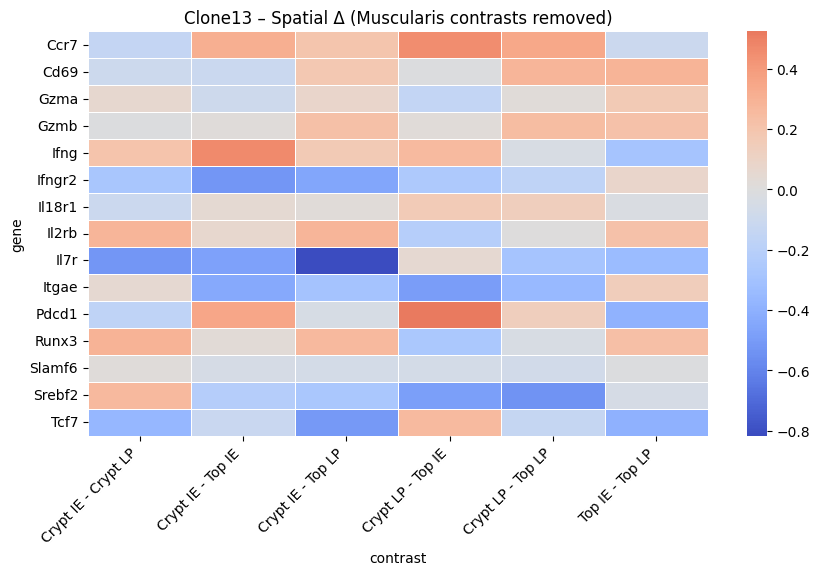

In [30]:
# Heatmap excluding Muscularis contrasts
mask = ~merged["contrast"].str.contains("Muscularis", case=False)
merged_no_musc = merged[mask]
heat_no_musc = merged_no_musc.pivot(index="gene", columns="contrast", values="delta_diff")
plt.figure(figsize=(10, 0.35 * len(heat_no_musc)))
sns.heatmap(heat_no_musc, cmap="coolwarm", center=0, linewidths=0.5, linecolor="white")
plt.title("Clone13 – Spatial Δ (Muscularis contrasts removed)")
plt.xticks(rotation=45, ha="right")
plt.show()


### Notes
- contrast: comparison between which two gates

- positive delta: for a contrast, gene is higher in the first gate than the second
- negative delta: for a contrast, gene is lower in the first gate than the second
